In [18]:
import yfinance as yf
import pandas as pd
stock = 'AAPL'
start_date = '2020-01-01'
end_date = '2023-01-01'
data = yf.download(stock, start=start_date, end=end_date)
data.head()


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,72.960449,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.251144,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.826851,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.484329,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.650337,132079200


In [19]:

data = data.dropna()
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,72.960449,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.251144,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.826851,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.484329,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.650337,132079200


In [3]:

data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['Volatility'] = data['Close'].rolling(window=20).std()
data = data.dropna()
data.head()


,Open,High,Low,Close,Adj Close,Volume,SMA_20,SMA_50,Volatility
Date,,,,,,,,,
2020-03-13,66.222504,69.980003,63.237499,69.492500,67.684196,370732000,73.158374,76.45170,5.152532
2020-03-16,60.487499,64.769997,60.000000,60.552502,58.976845,322423600,72.124124,76.16100,5.509157
2020-03-17,61.877499,64.402496,59.599998,63.215000,61.570057,324056000,71.297374,75.93815,5.545096
2020-03-18,59.942501,62.500000,59.279999,61.667500,60.062832,300233600,70.335499,75.67250,5.458637
2020-03-19,61.847500,63.209999,60.652500,61.195000,59.602615,271857200,69.391499,75.40445,5.316339


In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
features = ['Close', 'SMA_20', 'SMA_50', 'Volatility']
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[features])
kmeans = KMeans(n_clusters=3, random_state=0)
data['Cluster'] = kmeans.fit_predict(scaled_data)
data.head()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Open,High,Low,Close,Adj Close,Volume,SMA_20,SMA_50,Volatility,Cluster
Date,,,,,,,,,,
2020-03-13,66.222504,69.980003,63.237499,69.492500,67.684196,370732000,73.158374,76.45170,5.152532,2
2020-03-16,60.487499,64.769997,60.000000,60.552502,58.976845,322423600,72.124124,76.16100,5.509157,2
2020-03-17,61.877499,64.402496,59.599998,63.215000,61.570057,324056000,71.297374,75.93815,5.545096,2
2020-03-18,59.942501,62.500000,59.279999,61.667500,60.062832,300233600,70.335499,75.67250,5.458637,2
2020-03-19,61.847500,63.209999,60.652500,61.195000,59.602615,271857200,69.391499,75.40445,5.316339,2


In [5]:

data['Signal'] = 0
data.loc[data['Cluster'] == 0, 'Signal'] = 1
data.loc[data['Cluster'] == 1, 'Signal'] = -1
data.head()


,Open,High,Low,Close,Adj Close,Volume,SMA_20,SMA_50,Volatility,Cluster,Signal
Date,,,,,,,,,,,
2020-03-13,66.222504,69.980003,63.237499,69.492500,67.684196,370732000,73.158374,76.45170,5.152532,2,0
2020-03-16,60.487499,64.769997,60.000000,60.552502,58.976845,322423600,72.124124,76.16100,5.509157,2,0
2020-03-17,61.877499,64.402496,59.599998,63.215000,61.570057,324056000,71.297374,75.93815,5.545096,2,0
2020-03-18,59.942501,62.500000,59.279999,61.667500,60.062832,300233600,70.335499,75.67250,5.458637,2,0
2020-03-19,61.847500,63.209999,60.652500,61.195000,59.602615,271857200,69.391499,75.40445,5.316339,2,0


In [6]:

data['Returns'] = data['Close'].pct_change()
data['Strategy_Returns'] = data['Signal'].shift(1) * data['Returns']
data['Cumulative_Market_Returns'] = (1 + data['Returns']).cumprod() - 1
data['Cumulative_Strategy_Returns'] = (1 + data['Strategy_Returns']).cumprod() - 1
data.head()


,Open,High,Low,Close,Adj Close,Volume,SMA_20,SMA_50,Volatility,Cluster,Signal,Returns,Strategy_Returns,Cumulative_Market_Returns,Cumulative_Strategy_Returns
Date,,,,,,,,,,,,,,,
2020-03-13,66.222504,69.980003,63.237499,69.492500,67.684196,370732000,73.158374,76.45170,5.152532,2,0,NaN,NaN,NaN,NaN
2020-03-16,60.487499,64.769997,60.000000,60.552502,58.976845,322423600,72.124124,76.16100,5.509157,2,0,-0.128647,-0.0,-0.128647,0.0
2020-03-17,61.877499,64.402496,59.599998,63.215000,61.570057,324056000,71.297374,75.93815,5.545096,2,0,0.043970,0.0,-0.090333,0.0
2020-03-18,59.942501,62.500000,59.279999,61.667500,60.062832,300233600,70.335499,75.67250,5.458637,2,0,-0.024480,-0.0,-0.112602,0.0
2020-03-19,61.847500,63.209999,60.652500,61.195000,59.602615,271857200,69.391499,75.40445,5.316339,2,0,-0.007662,-0.0,-0.119401,0.0


In [7]:

data['Returns'] = data['Close'].pct_change()
data['Strategy_Returns'] = data['Signal'].shift(1) * data['Returns']
data['Cumulative_Market_Returns'] = (1 + data['Returns']).cumprod() - 1
data['Cumulative_Strategy_Returns'] = (1 + data['Strategy_Returns']).cumprod() - 1
data.head()


,Open,High,Low,Close,Adj Close,Volume,SMA_20,SMA_50,Volatility,Cluster,Signal,Returns,Strategy_Returns,Cumulative_Market_Returns,Cumulative_Strategy_Returns
Date,,,,,,,,,,,,,,,
2020-03-13,66.222504,69.980003,63.237499,69.492500,67.684196,370732000,73.158374,76.45170,5.152532,2,0,NaN,NaN,NaN,NaN
2020-03-16,60.487499,64.769997,60.000000,60.552502,58.976845,322423600,72.124124,76.16100,5.509157,2,0,-0.128647,-0.0,-0.128647,0.0
2020-03-17,61.877499,64.402496,59.599998,63.215000,61.570057,324056000,71.297374,75.93815,5.545096,2,0,0.043970,0.0,-0.090333,0.0
2020-03-18,59.942501,62.500000,59.279999,61.667500,60.062832,300233600,70.335499,75.67250,5.458637,2,0,-0.024480,-0.0,-0.112602,0.0
2020-03-19,61.847500,63.209999,60.652500,61.195000,59.602615,271857200,69.391499,75.40445,5.316339,2,0,-0.007662,-0.0,-0.119401,0.0


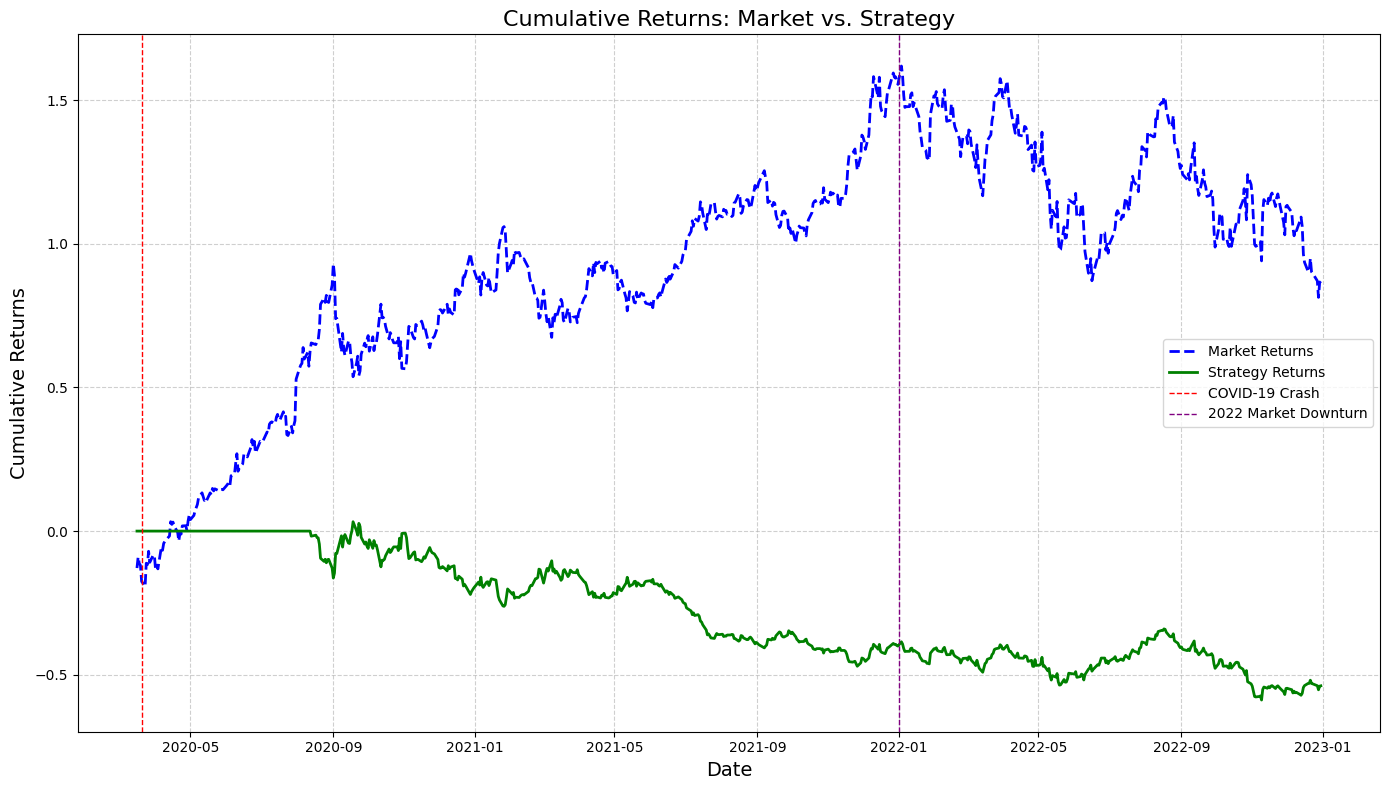

Final Market Cumulative Return: 0.869698055260558
Final Strategy Cumulative Return: -0.5387043805919733


In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 8))
plt.plot(data.index, data['Cumulative_Market_Returns'], label='Market Returns', color='blue', linestyle='--', linewidth=2)
plt.plot(data.index, data['Cumulative_Strategy_Returns'], label='Strategy Returns', color='green', linestyle='-', linewidth=2)
plt.title('Cumulative Returns: Market vs. Strategy', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Cumulative Returns', fontsize=14)
plt.legend(loc='best', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.axvline(pd.to_datetime('2020-03-20'), color='red', linestyle='--', linewidth=1, label='COVID-19 Crash')
plt.axvline(pd.to_datetime('2022-01-01'), color='purple', linestyle='--', linewidth=1, label='2022 Market Downturn')

plt.legend()
plt.tight_layout()
plt.show()
print("Final Market Cumulative Return:", data['Cumulative_Market_Returns'].iloc[-1])
print("Final Strategy Cumulative Return:", data['Cumulative_Strategy_Returns'].iloc[-1])
